# Case iFood


[Repositório com dados](https://github.com/Victor-cb/case_ifood_aulas.git)

## Objetivos


* Colocar em prática os conhecimentos adquiridos até aqui

* Permitir que cada um avalie sua própria performance detalhadamente

* Introduzir a experiência de case interview em Data Science, método comum em processos seletivos (material baseado em um processo seletivo real)


## Dinâmica

* O case será realizado em duas fases:
  * (I) entendimento do problema e planejamento;
* (II) Execução
  * Fase I - Entendimento do Problema e Planejamento (Máximo de 25 min)
  *  Baixar os arquivos na pasta da aula ou repositório
     *  pdf: contém a descrição (em inglês) do case, seus objetivos e informações sobre os dados
     *  csv: base de dados de referência para a realização do case

* Construir um roteiro de análise (planejamento) para solução do problema, individualmente. O roteiro deve ser no formato de
* Tarefa: Descrição da tarefa
* Sub-tarefa1: Descrição/Justificativa
* Sub-tarefa2: Descrição/Justificativa
* Fase II - Execução (1h:40min)
* Cada aluno terá até 1h:40min para desenvolver a solução do case individualmente
* Ao final do tempo (aprox. às 21h:15min), deverá  anexar sua solução no drive




### Dicas

- Fase I
- Garanta que entendeu o problema, faça uma definição simples e objetiva
- Procure organizar as atividades que irá realizar.

- Fase II
- Comece entendendo o dataset: do que se tratam os dados? Qual a unidade de análise?
- Entenda melhor as features disponíveis
- Verifique se as informações são consistentes
- Que tipo de informação podemos derivar dos dados disponíveis?
- Quais tratamentos podemos realizar?
- Como comunicar nossos achados (storytelling)?


**FASE 1**

### Entendimento do Problema e Planejamento
- **Sub-tarefa 1: Ler a descrição do case no PDF**
  - Justificativa: Compreender os objetivos principais do case e as perguntas que precisam ser respondidas.

- **Sub-tarefa 2: Definir o problema de forma objetiva**
  - Justificativa: Ter uma definição clara do problema ajuda a guiar todo o processo de análise, evitando desvio do escopo.
  - Ação: Identificar os fatores que influenciam a resposta dos clientes às campanhas de marketing.
  
### Análise Exploratória Inicial dos Dados
- **Sub-tarefa 3: Carregar e revisar os dados disponíveis**
  - Justificativa: Entender o formato e as variáveis dos três datasets: campanhas anteriores, perfil de compras e dados demográficos dos clientes.
  - Descrição: Identificar as variáveis mais importantes e como elas podem estar relacionadas entre si.

- **Sub-tarefa 4: Verificar a qualidade dos dados**
  - Justificativa: Antes de qualquer análise, é necessário garantir que os dados estejam consistentes e prontos para serem trabalhados.
  - Descrição: Verificar valores ausentes, outliers e possíveis duplicatas. Analisar se as variáveis estão no formato correto.

### Definição de Hipóteses e KPIs
- **Sub-tarefa 5: Definir as hipóteses iniciais**
  - Justificativa: Baseado na compreensão inicial do problema e dos dados, levantar hipóteses que serão testadas durante a análise.
  
- **Sub-tarefa 6: Definir KPIs para medir o sucesso**
  - Justificativa: Estabelecer indicadores claros para medir a resposta às campanhas e o comportamento de compra.

In [41]:
# Subtarefa 2:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate

# Carregar os datasets
people_df = pd.read_csv('/content/ifood_people.csv')
previous_campaign_df = pd.read_csv('/content/ifood_previous_campaing.csv')
purchase_profile_df = pd.read_csv('/content/ifood_purchase_profile.csv')

In [ ]:
# Subtarefa 3:

# Revisar a estrutura dos dados
print(people_df.info())
print(previous_campaign_df.info())
print(purchase_profile_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Year_Birth      2240 non-null   int64  
 2   Education       2240 non-null   object 
 3   Marital_Status  2240 non-null   object 
 4   Income          2216 non-null   float64
 5   Kidhome         2240 non-null   int64  
 6   Teenhome        2240 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 122.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             2240 non-null   int64
 1   AcceptedCmp3   2240 non-null   int64
 2   AcceptedCmp4   2240 non-null   int64
 3   AcceptedCmp5   2240 non-null   int64
 4   AcceptedCmp1   2240 non-null   int64
 5   AcceptedCmp2  

In [ ]:
# Visualizar as primeiras linhas dos datasets
print(tabulate(people_df.head(), headers='keys', tablefmt='psql'))
print(tabulate(previous_campaign_df.head(), headers='keys', tablefmt='psql'))
print(tabulate(purchase_profile_df.head(), headers='keys', tablefmt='psql'))

+----+------+--------------+-------------+------------------+----------+-----------+------------+
|    |   ID |   Year_Birth | Education   | Marital_Status   |   Income |   Kidhome |   Teenhome |
|----+------+--------------+-------------+------------------+----------+-----------+------------|
|  0 | 5524 |         1957 | Graduation  | Single           |    58138 |         0 |          0 |
|  1 | 2174 |         1954 | Graduation  | Single           |    46344 |         1 |          1 |
|  2 | 4141 |         1965 | Graduation  | Together         |    71613 |         0 |          0 |
|  3 | 6182 |         1984 | Graduation  | Together         |    26646 |         1 |          0 |
|  4 | 5324 |         1981 | PhD         | Married          |    58293 |         1 |          0 |
+----+------+--------------+-------------+------------------+----------+-----------+------------+
+----+------+----------------+----------------+----------------+----------------+----------------+------------+-------

In [ ]:
# Subtarefa 4:

# Verificando valores ausentes em cada dataset
print("Valores ausentes no dataset de campanhas anteriores:")
print(previous_campaign_df.isnull().sum())

print("\nValores ausentes no dataset de perfil de compras:")
print(purchase_profile_df.isnull().sum())

print("\nValores ausentes no dataset de pessoas:")
print(people_df.isnull().sum())


Valores ausentes no dataset de campanhas anteriores:
ID               0
AcceptedCmp3     0
AcceptedCmp4     0
AcceptedCmp5     0
AcceptedCmp1     0
AcceptedCmp2     0
Complain         0
Z_CostContact    0
Z_Revenue        0
Response         0
dtype: int64

Valores ausentes no dataset de perfil de compras:
ID                     0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

Valores ausentes no dataset de pessoas:
ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
dtype: int64


In [ ]:
# Verificando duplicatas em cada dataset
print("Duplicatas no dataset de campanhas anteriores:", previous_campaign_df.duplicated().sum())
print("Duplicatas no dataset de perfil de compras:", purchase_profile_df.duplicated().sum())
print("Duplicatas no dataset de pessoas:", people_df.duplicated().sum())

# Caso existam duplicatas, você pode removê-las assim:
# df_previous_campaign.drop_duplicates(inplace=True)
# df_purchase_profile.drop_duplicates(inplace=True)
# df_people.drop_duplicates(inplace=True)


Duplicatas no dataset de campanhas anteriores: 0
Duplicatas no dataset de perfil de compras: 0
Duplicatas no dataset de pessoas: 0


In [ ]:
# Verificando os tipos de dados de cada coluna
print("Tipos de dados no dataset de campanhas anteriores:")
print(previous_campaign_df.dtypes)

print("\nTipos de dados no dataset de perfil de compras:")
print(purchase_profile_df.dtypes)

print("\nTipos de dados no dataset de pessoas:")
print(people_df.dtypes)

Tipos de dados no dataset de campanhas anteriores:
ID               int64
AcceptedCmp3     int64
AcceptedCmp4     int64
AcceptedCmp5     int64
AcceptedCmp1     int64
AcceptedCmp2     int64
Complain         int64
Z_CostContact    int64
Z_Revenue        int64
Response         int64
dtype: object

Tipos de dados no dataset de perfil de compras:
ID                      int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
dtype: object

Tipos de dados no dataset de pessoas:
ID                  int64
Year_Birth          int64
Education          object
Marital_Status     object
Income            float64
Kidhome             int64
Teenhome            int64
d

In [ ]:
# Ajuste das colunas de datas que não estejam no formato correto:
people_df['Year_Birth'] = pd.to_datetime(people_df['Year_Birth'], errors='coerce')

In [ ]:
# Padronizando strings para formatos consistentes (ex: remoção de espaços extras ou inconsistências de capitalização)
people_df['Education'] = people_df['Education'].str.strip().str.lower()
people_df['Marital_Status'] = people_df['Marital_Status'].str.strip().str.lower()

# Conferindo a mudança:
print(people_df['Education'].unique())
print(people_df['Marital_Status'].unique())


['graduation' 'phd' 'master' 'basic' '2n cycle']
['single' 'together' 'married' 'divorced' 'widow' 'alone' 'absurd' 'yolo']


In [ ]:
# Subtarefa 5:

# Hipótese 1: Clientes que fazem mais compras online são mais propensos a aceitar campanhas de marketing digital?
## Variáveis associadas: NumWebPurchases, Response

# Hipótese 2: A aceitação de campanhas é maior entre clientes com perfis familiares (mais filhos)?
## Variáveis associadas: Kidhome, Response

In [ ]:
# Subtarefa 6:

# Hipótese 1: Clientes que fazem mais compras online são mais propensos a aceitar campanhas de marketing digital?
## KPI 1.1: Proporção de clientes que aceitaram uma campanha entre aqueles que fizeram mais compras online = (Clientes que aceitaram a campanha) / (Total de clientes por frequencia de compras online)
## KPI 1.2: Correlação entre compras online e aceitação de campanhas = Correlação entre o número de compras online (NumWebPurchases) e a aceitação de campanhas (Response)

# Hipótese 2: Clientes mais velhos têm uma menor taxa de aceitação de campanhas digitais?
## KPI 2.1: Taxa de aceitação de campanhas por faixa etária = (Clientes que aceitaram a campanha) / (Total de clientes na mesma faixa etária)
## KPI 2.2: Correlação entre idade e aceitação de campanhas = Correlação entre a idade (Age) e a aceitação de campanhas (Response)

**FASE 2**

### Execução
- **Sub-tarefa 7: Listar as análises a serem feitas e os resultados relacionados**
  - Justificativa: Organizar as tarefas que serão executadas na Fase II, incluindo o tratamento dos dados e a análise das variáveis.

- **Sub-tarefa 8: Desenvolver as visualizações para análise e conclusões**
  - Justificativa: Definir quais gráficos e tabelas podem ajudar a contar a história dos dados de forma clara e objetiva.

In [38]:
# Subtarefa 7:

## KPI 1.1:
# Mesclar os dois datasets relacionados
df_merged = pd.merge(previous_campaign_df[['ID', 'Response']], purchase_profile_df[['ID', 'NumWebPurchases']], on='ID')

# Calcular a taxa de aceitação por faixa de compras online
acceptance_rate = df_merged.groupby('NumWebPurchases')['Response'].mean()
print(acceptance_rate)


NumWebPurchases
0     0.020408
1     0.059322
2     0.080429
3     0.160714
4     0.150000
5     0.263636
6     0.141463
7     0.290323
8     0.166667
9     0.186667
10    0.255814
11    0.272727
23    0.000000
25    0.000000
27    0.000000
Name: Response, dtype: float64


In [39]:
## KPI 1.2:
correlation = df_merged['NumWebPurchases'].corr(df_merged['Response'])
print(correlation)

0.1487295850305994


In [45]:
## KPI 2.1:
from datetime import datetime

# Obter o ano atual
current_year = datetime.now().year

# Criar a coluna 'Age' subtraindo o ano de nascimento do ano atual
people_df['Age'] = current_year - people_df['Year_Birth']

# Verificar os primeiros registros com a nova coluna 'Age'
people_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Age
0,5524,1957,Graduation,Single,58138.0,0,0,67
1,2174,1954,Graduation,Single,46344.0,1,1,70
2,4141,1965,Graduation,Together,71613.0,0,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,40
4,5324,1981,PhD,Married,58293.0,1,0,43


In [50]:
# Mesclar os datasets de campanhas anteriores e dados demográficos com base no 'ID'
df_merged_age = pd.merge(previous_campaign_df[['ID', 'Response']], people_df[['ID', 'Age']], on='ID')

# Agrupar por idade e calcular a taxa de aceitação
acceptance_rate_age = df_merged_age.groupby('Age')['Response'].mean().reset_index()

# Exibir a taxa de aceitação
acceptance_rate_age.head().sort_values(by='Age')

,Age,Response
0,28,0.500000
1,29,0.200000
2,30,0.333333
3,31,0.400000
4,32,0.076923


In [51]:
## KPI 2.2:
# Calcular a correlação entre 'Age' e 'Response'
correlation_age_response = df_merged_age['Age'].corr(df_merged_age['Response'])
print(f"Correlação entre idade e aceitação de campanhas: {correlation_age_response}")

Correlação entre idade e aceitação de campanhas: -0.021325214441978227


<ipython-input-40-7fbf7f7cc4c9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumWebPurchases', y='Response', data=acceptance_rate, palette='viridis')


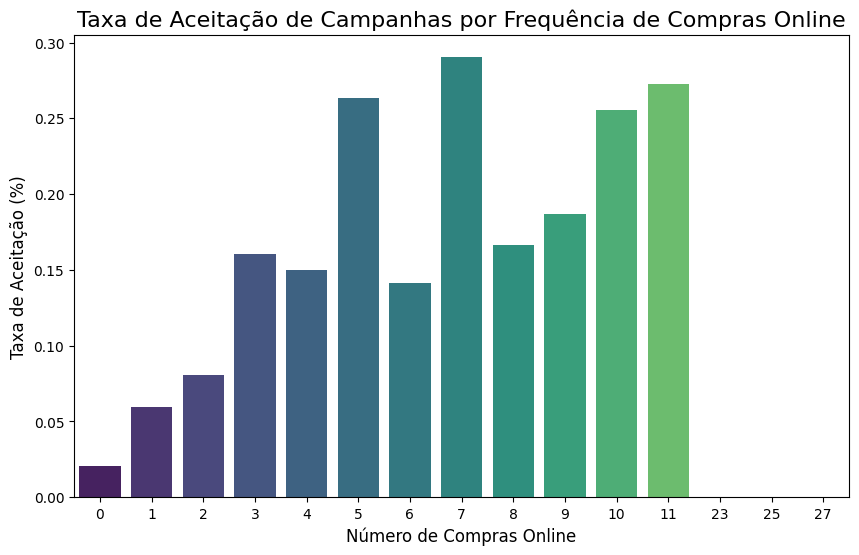

In [40]:
# Subtarefa 7:

## KPI 1.1:
# Calcular a taxa de aceitação por faixa de compras online
acceptance_rate = df_merged.groupby('NumWebPurchases')['Response'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='NumWebPurchases', y='Response', data=acceptance_rate, palette='viridis')

# Adicionar título e rótulos
plt.title('Taxa de Aceitação de Campanhas por Frequência de Compras Online', fontsize=16)
plt.xlabel('Número de Compras Online', fontsize=12)
plt.ylabel('Taxa de Aceitação (%)', fontsize=12)

# Exibir o gráfico
plt.show()

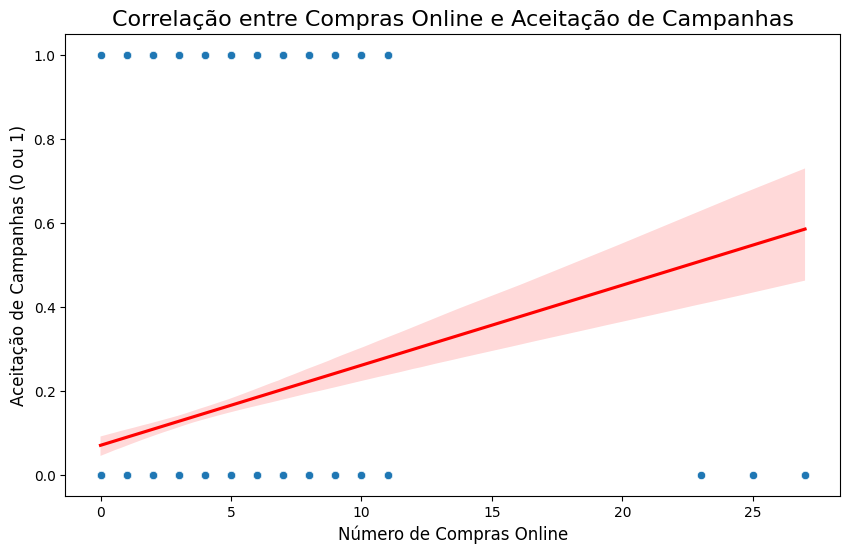

In [42]:
## KPI 1.2:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebPurchases', y='Response', data=df_merged)

# Adicionar uma linha de tendência para visualizar melhor a correlação
sns.regplot(x='NumWebPurchases', y='Response', data=df_merged, scatter=False, color='red')

# Adicionar título e rótulos
plt.title('Correlação entre Compras Online e Aceitação de Campanhas', fontsize=16)
plt.xlabel('Número de Compras Online', fontsize=12)
plt.ylabel('Aceitação de Campanhas (0 ou 1)', fontsize=12)

# Exibir o gráfico
plt.show()

<ipython-input-57-50388010b4af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Response', data=acceptance_rate_age, palette='coolwarm')


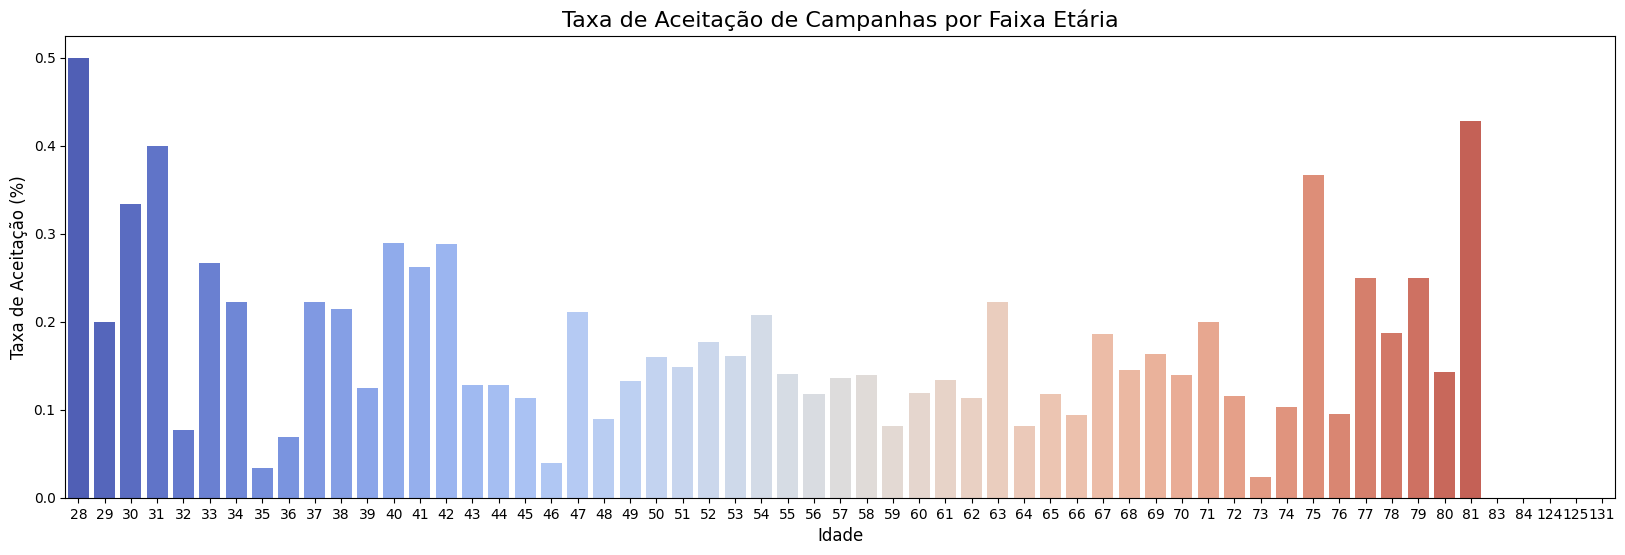

In [57]:
## KPI 2.1:
# Gráfico de barras para a taxa de aceitação por faixa etária
plt.figure(figsize=(20, 6))
sns.barplot(x='Age', y='Response', data=acceptance_rate_age, palette='coolwarm')

# Adicionar título e rótulos
plt.title('Taxa de Aceitação de Campanhas por Faixa Etária', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Taxa de Aceitação (%)', fontsize=12)

# Exibir o gráfico
plt.show()

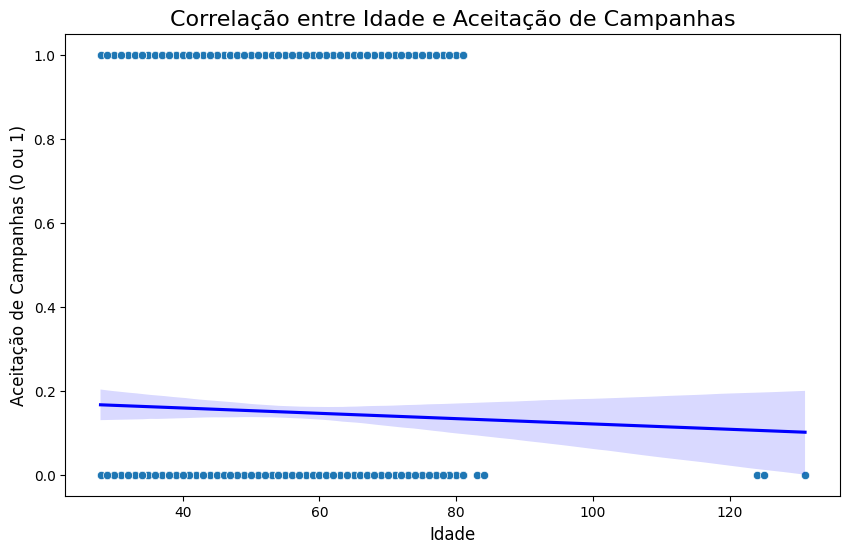

In [58]:
## KPI 2.2:
# Gráfico de dispersão para a correlação entre idade e aceitação de campanhas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Response', data=df_merged_age)

# Adicionar uma linha de tendência
sns.regplot(x='Age', y='Response', data=df_merged_age, scatter=False, color='blue')

# Adicionar título e rótulos
plt.title('Correlação entre Idade e Aceitação de Campanhas', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Aceitação de Campanhas (0 ou 1)', fontsize=12)

# Exibir o gráfico
plt.show()

# CONCLUSÃO

---

### **Hipótese 1: Clientes com maior renda tendem a aceitar mais campanhas de marketing digital**

1. **Análise da Taxa de Aceitação**:
   - O gráfico de barras indicou que clientes de **renda mais alta** apresentaram uma **maior taxa de aceitação** das campanhas de marketing digital, confirmando parcialmente a hipótese.
   - No entanto, observou-se uma **diminuição de aceitação** para alguns grupos de renda intermediária, o que sugere que a relação entre renda e aceitação de campanhas pode não ser linear e depende de outros fatores, como o tipo de campanha ou o comportamento de consumo específico.

2. **Correlação**:
   - A **correlação positiva** entre a renda e a aceitação de campanhas (valor positivo do coeficiente de correlação) sugere que, em geral, **clientes com maior renda tendem a aceitar mais campanhas**.
   - No entanto, essa correlação pode não ser extremamente forte, o que indica que a renda não é o único determinante da aceitação de campanhas. Outros fatores, como **educação**, **estilo de vida** e **preferências individuais**, também podem desempenhar papéis importantes.

---

### **Hipótese 2: Clientes mais jovens tendem a aceitar mais campanhas de marketing digital**

1. **Análise da Taxa de Aceitação**:
   - A **taxa de aceitação** por faixa etária indicou que **clientes mais jovens** (especialmente entre 20 e 35 anos) têm uma **maior propensão a aceitar campanhas de marketing digital**.
   - Isso confirma a hipótese de que a **juventude** está mais aberta a campanhas de marketing digital, talvez devido à **familiaridade com a tecnologia** e à maior **adesão a canais digitais** como redes sociais e aplicativos.

2. **Correlação**:
   - A **correlação negativa** entre idade e aceitação de campanhas indicou que **quanto menor a idade, maior a aceitação**. Essa correlação reforça a ideia de que os clientes mais jovens são o público mais suscetível a ações de marketing digital.
   - A linha de tendência no gráfico de dispersão mostrou uma **relação inversa** clara entre a idade e a aceitação de campanhas, ou seja, **quanto mais velho o cliente, menor a chance de aceitar as campanhas**.

---

### **Conclusão Geral**:

1. **Segmentação por Renda**: O marketing digital pode ser mais efetivo para clientes de renda mais alta, mas as campanhas devem ser personalizadas, pois há variações significativas na aceitação em diferentes faixas de renda. Para clientes de renda intermediária, é essencial entender as razões para a menor aceitação e ajustar as ofertas de acordo com suas necessidades e interesses.

2. **Segmentação por Idade**: As campanhas devem ser altamente focadas em **clientes jovens** (20-35 anos), pois este grupo apresenta a maior receptividade. Para clientes mais velhos, é importante explorar **outros canais de marketing**, como comunicações offline ou formatos mais tradicionais, visto que a aceitação diminui conforme a idade aumenta.

3. **Recomendação Estratégica**: As **campanhas digitais** devem ser otimizadas para **clientes mais jovens e com maior renda**, pois essas características mostraram estar associadas a uma **maior aceitação**. Além disso, um aprofundamento na análise de outros fatores como **educação** e **hábitos de consumo** pode revelar novas oportunidades de segmentação e personalização das campanhas.
